# Build a model to predict a person has diabetes or not

In [ ]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install -U scikit-learn


## Importing Libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import pickle
import json
print("Libraries imported")

Libraries imported


## Load the data

In [3]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA

In [3]:
# Dimension of dataset
df.shape

(768, 9)

In [4]:
#Summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#checking duplicates
df.duplicated().sum()

0

In [6]:
#checking missing data
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### Here all null values are give zero. so first replace it with nan

In [4]:
df1=df.copy()
df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [5]:
# retrieving last records
df1.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1
767,1,93.0,70.0,31.0,NaN,30.4,0.315,23,0


In [6]:
#checking missing data
df1.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

#####  imputing the mean value of the column to each missing value of that particular column.

In [7]:
df1['Glucose'].fillna(df1['Glucose'].mean(),inplace=True)
df1['BloodPressure'].fillna(df1['BloodPressure'].mean(),inplace=True)
df1['SkinThickness'].fillna(df1['SkinThickness'].mean(),inplace=True)
df1['Insulin'].fillna(df1['Insulin'].mean(),inplace=True)
df1['BMI'].fillna(df1['BMI'].mean(),inplace=True)
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [8]:
df1.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1
767,1,93.0,70.0,31.00000,155.548223,30.4,0.315,23,0


In [9]:
#column names
df1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
#statistics of dataset
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Detect and remove outliers

<Figure size 1500x500 with 0 Axes>

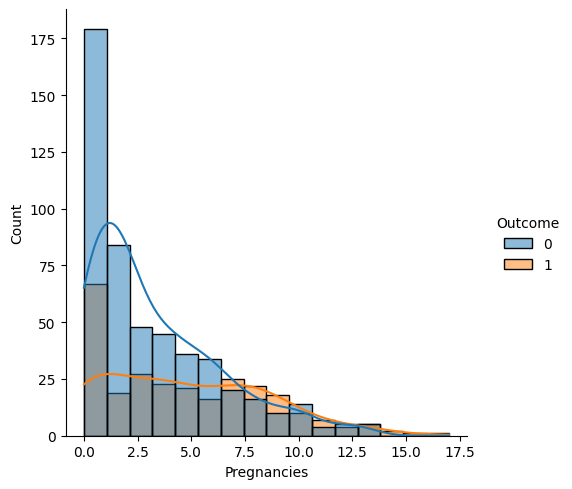

<Figure size 1500x500 with 0 Axes>

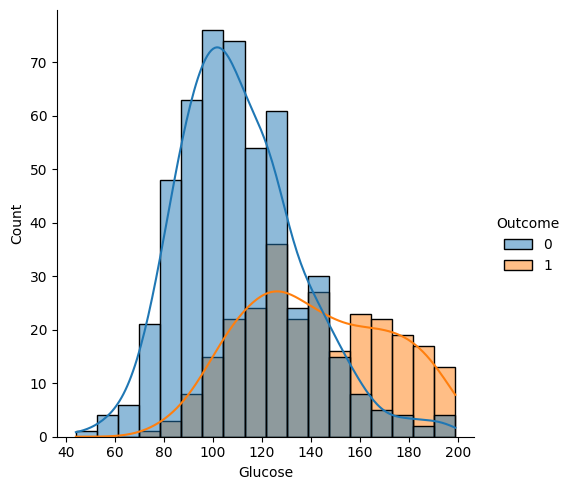

<Figure size 1500x500 with 0 Axes>

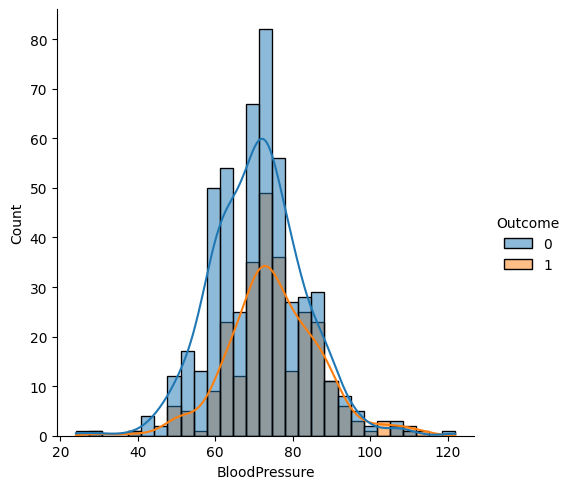

<Figure size 1500x500 with 0 Axes>

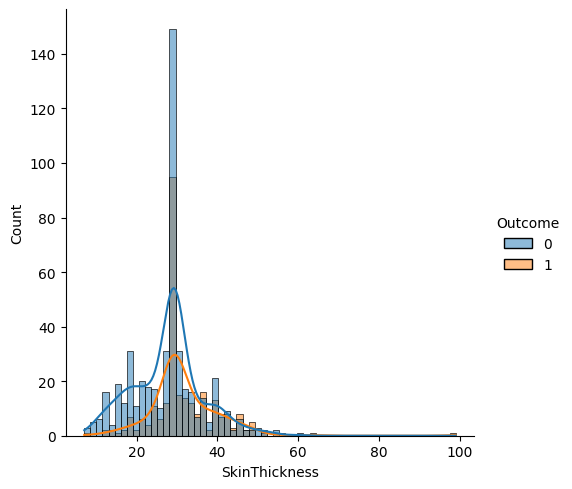

<Figure size 1500x500 with 0 Axes>

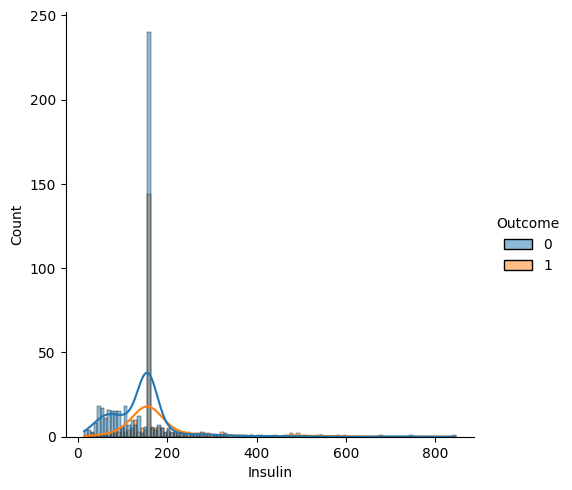

<Figure size 1500x500 with 0 Axes>

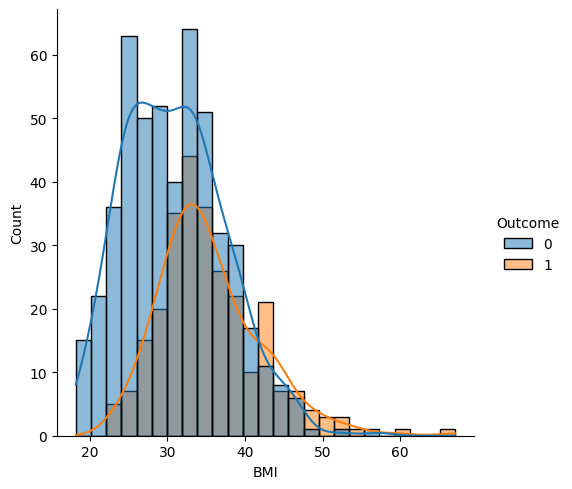

<Figure size 1500x500 with 0 Axes>

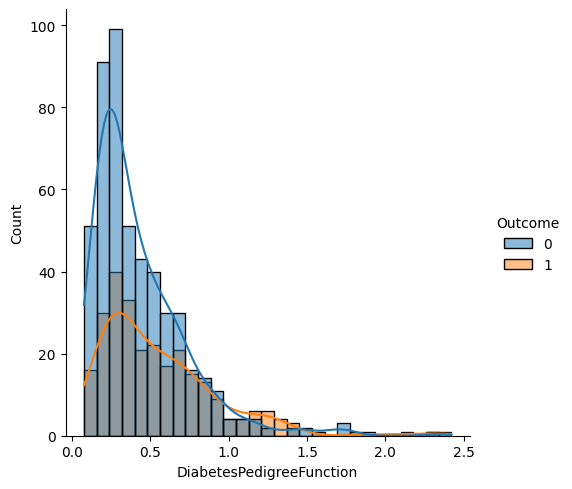

<Figure size 1500x500 with 0 Axes>

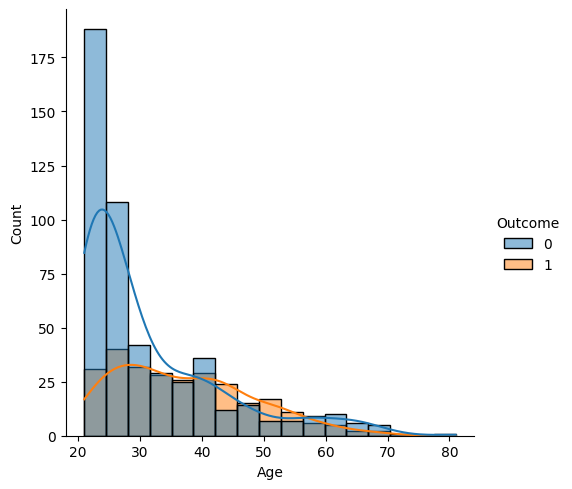

In [11]:
# plotting distribution plot to examine the plottong of data

def distribution_plot(df,column_name,target):
    plt.figure(figsize=(15,5))
    sns.displot(data=df,x=column_name,hue=target,kde=True)
    plt.show()
 
#distribution_plot(df1,df1['Glucose'],df1['Outcome']) 
cols=df1.drop('Outcome',axis=1)
for feature in cols:
    distribution_plot(df1,feature,df1['Outcome'])
    

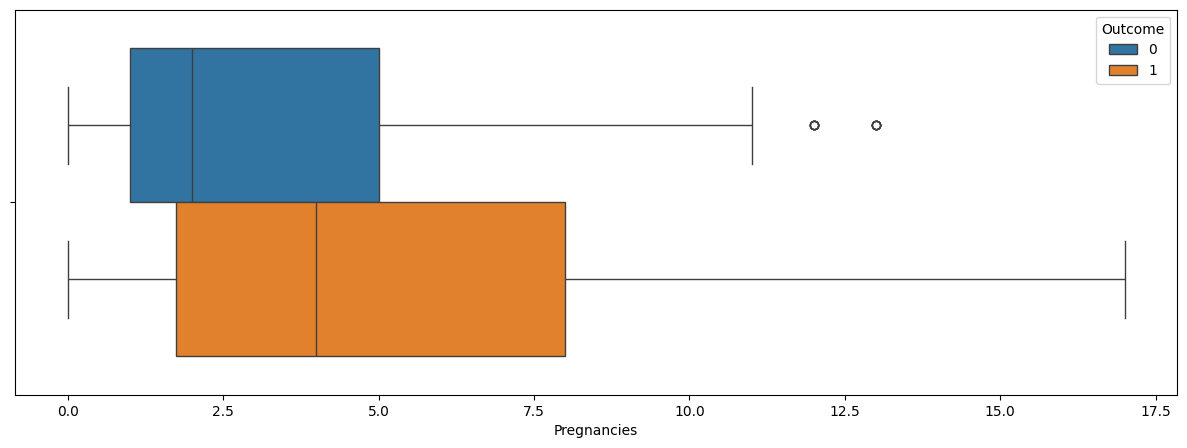

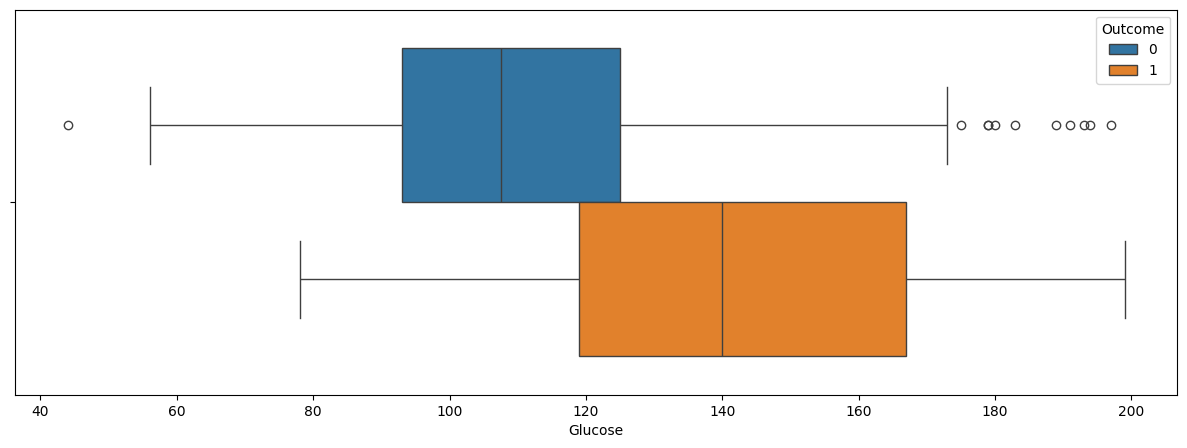

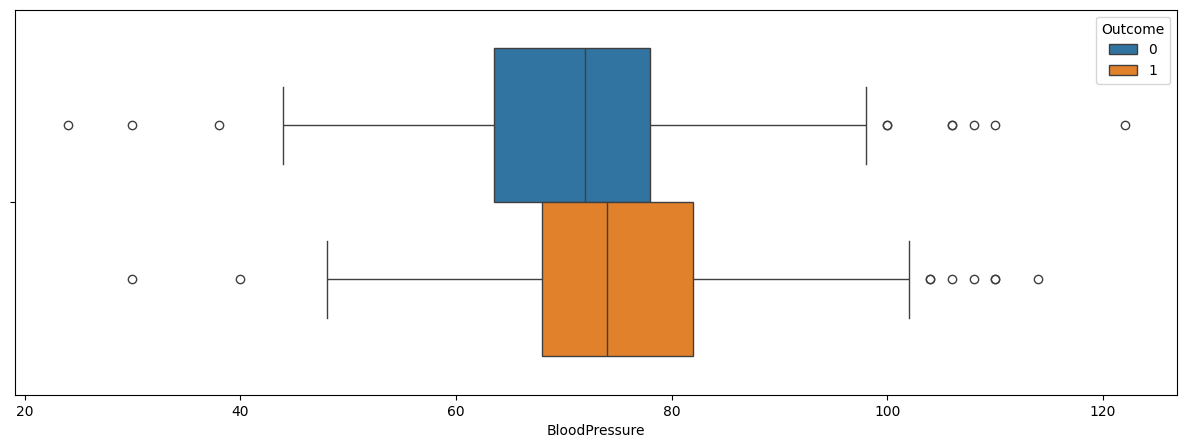

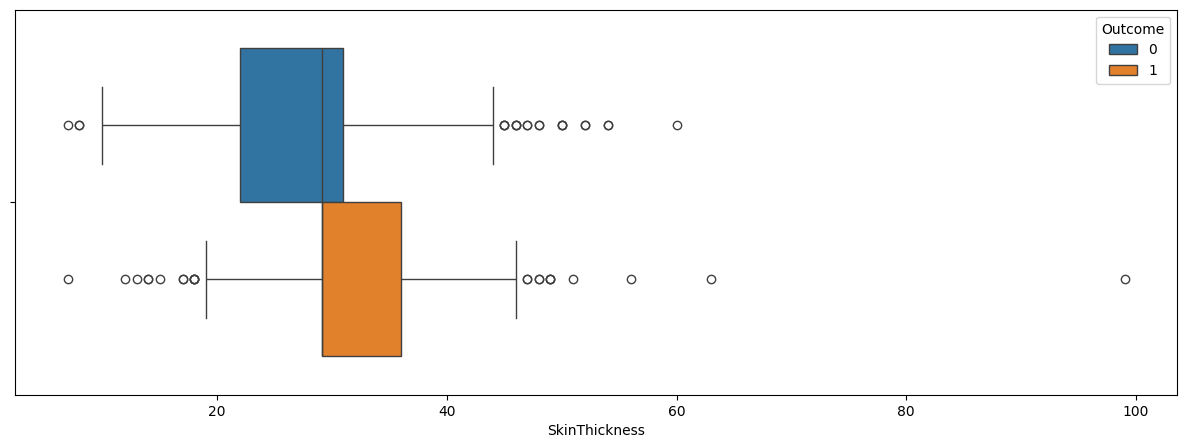

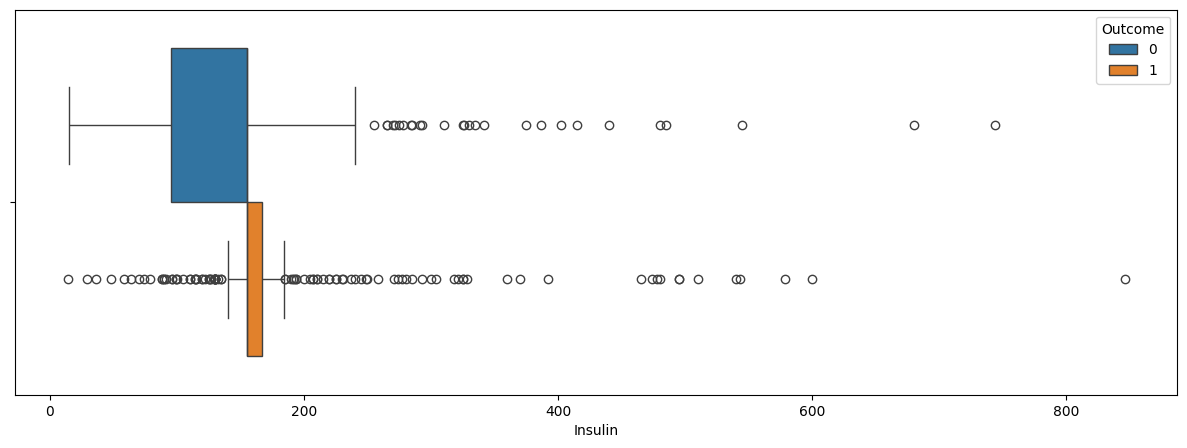

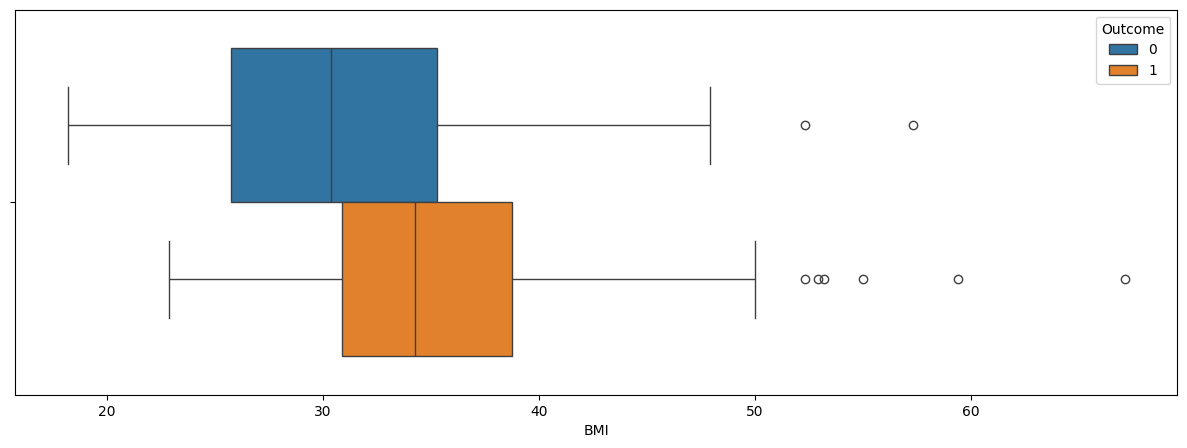

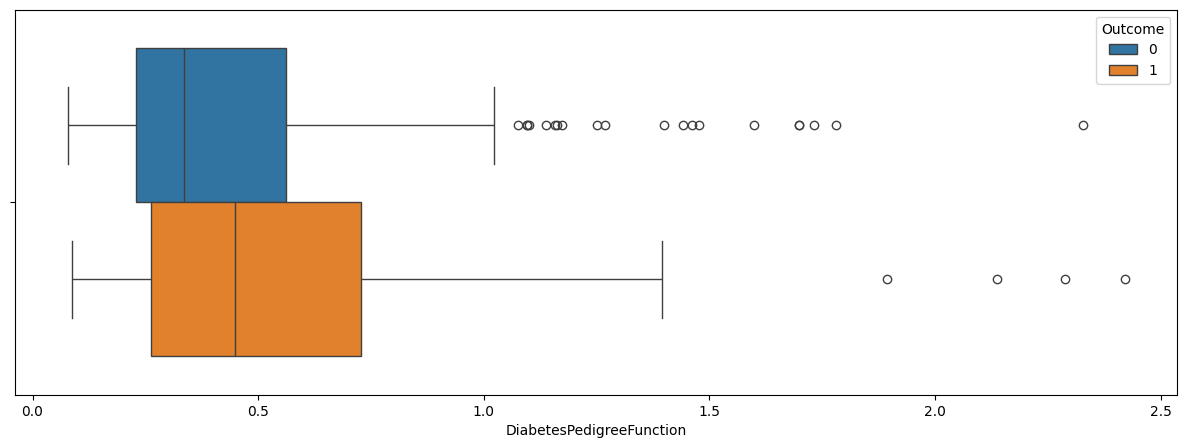

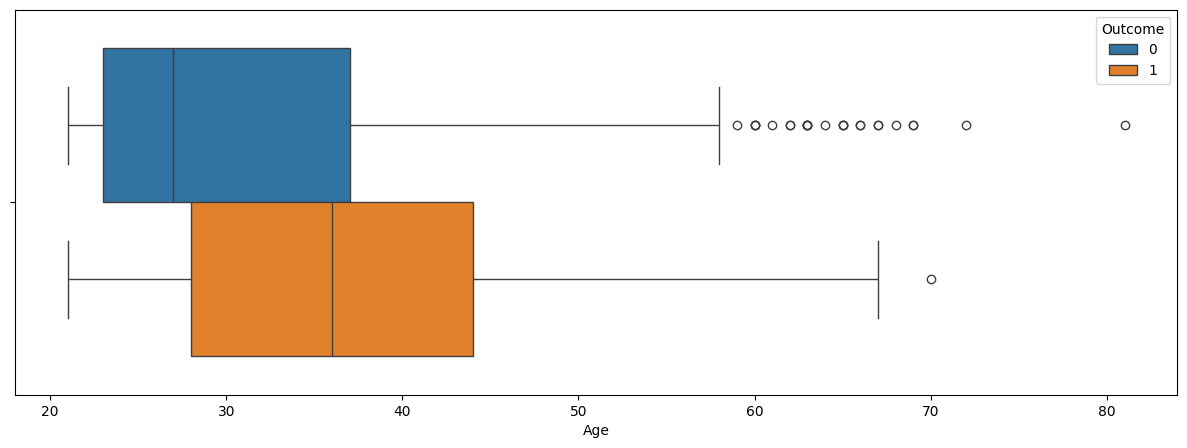

In [12]:
# plotting box plot to examine the outliers of data
def box_plot(df,column_name,target):
    plt.figure(figsize=(15,5))
    sns.boxplot(data=df,x=column_name,hue=target)
    plt.show()

#box_plot(df1,df1['Glucose'],df1['Outcome'])  
for feature in cols:
    box_plot(df1,feature,df1['Outcome']) 

In [13]:
df1.Outcome.value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

###### 0----No diatetes
###### 1---diabetes

#### Dataset has imbalanced data

In [14]:
df1.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.710121,70.935397,27.768651,142.210761,30.888434,0.429734,31.190000
1,4.865672,142.165573,75.147324,31.736944,180.431548,35.384757,0.550500,37.067164


In [ ]:
#print(df1[df1.Outcome == 0]['Glucose'].count())
#print(df1[df1.Outcome ==1]['Glucose'].count())


In [15]:
# Detect and remove outliers for skewed data
def detect_outliers_skewed(dataframe,n,features):
    outlier_indices = []
    df_out = pd.DataFrame()
    """
    Detect outliers from given list of feature. It returns a list of the indices
    according to the observations containing more than n outliers
    """
    # iterate over features(columns)
    for col in features:
        Q1 = np.percentile(dataframe[col], 25)
        Q3 = np.percentile(dataframe[col],75)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
            
        # select observations containing more than 2 outliers
        outlier_index = Counter(outlier_indices)
        #print("outlier_index",outlier_index)
        multiple_outliers = list( k for k, v in outlier_index.items() if v > n )
    
    return multiple_outliers   
       
# detect outliers from numeric features
outliers_to_drop_skewed = detect_outliers_skewed(df1, 1 ,['Age','Pregnancies','DiabetesPedigreeFunction'])
outliers_to_drop_skewed
    

[]

In [16]:
df1.drop(df1.loc[outliers_to_drop_skewed].index, inplace=True)
df1.shape

(768, 9)

In [17]:
# Detect and remove outliers for normal distribution data
def detect_outliers(dataframe,n,features):
    outlier_indices = []
    df_out = pd.DataFrame()
    """
    Detect outliers from given list of features. It returns a list of the indices
    according to the observations containing more than n outliers
    """
    # iterate over features(columns)
    for col in features:
       
        upper_boundary = dataframe[col].mean() + 3 * dataframe[col].std()
        lower_boundary =  dataframe[col].mean() - 3 * dataframe[col].std()
        
        reduced_df = dataframe[(dataframe[col]<upper_boundary) & ( dataframe[col]>lower_boundary)] 
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
        # Determine a list of indices of outliers for feature col
        outlier_list_col  = dataframe[(dataframe[col]>upper_boundary) | ( dataframe[col]<lower_boundary)].index
        
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
        # select observations containing more than 2 outliers
        outlier_index = Counter(outlier_indices)
        #print("outlier_index",outlier_index)
        multiple_outliers = list( k for k, v in outlier_index.items() if v > n )
        #print("multiple_outliers",multiple_outliers)
    return multiple_outliers   

        
      

# detect outliers from numeric features
outliers_to_drop = detect_outliers(df1, 1 ,['Glucose', 'BloodPressure', 'BMI', 'SkinThickness', 'Insulin'])
outliers_to_drop
#print("outliers_to_drop",outliers_to_drop)

[125, 177, 120, 445]

In [18]:
df1.drop(df1.loc[outliers_to_drop].index, inplace=True)
df1.shape

(764, 9)

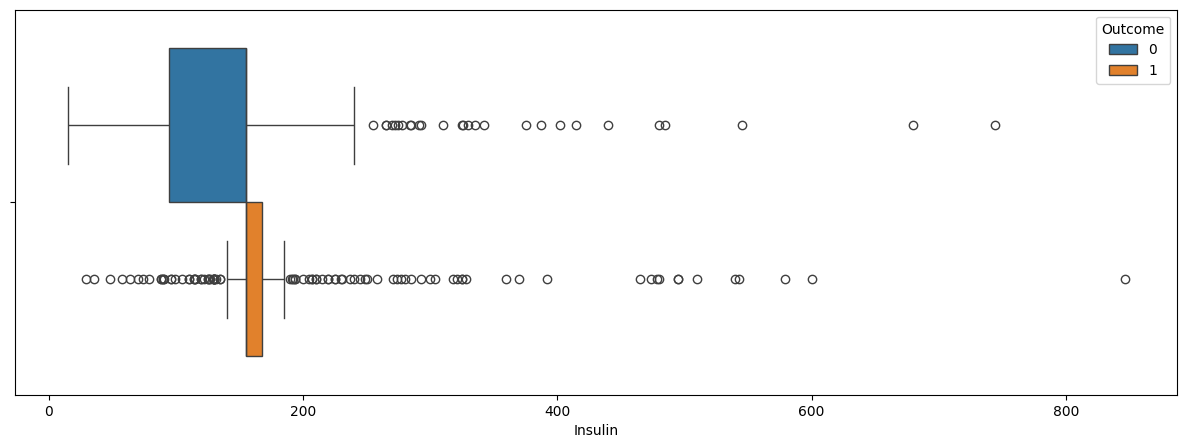

In [19]:
box_plot(df1,df1['Insulin'],df1['Outcome'])

In [20]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,3.863874,121.592191,72.399452,29.035113,155.913659,32.320199,0.469119,33.281414,0.345550
std,3.368158,30.381744,11.950797,8.639299,85.035292,6.613810,0.324396,11.777564,0.475859
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,124.250000,27.500000,0.242500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,155.548223,32.400000,0.370500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,155.548223,36.500000,0.624500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,57.300000,2.329000,81.000000,1.000000


### Model Building

In [21]:
X=df1.drop('Outcome',axis=1)
y=df1['Outcome']
X.shape

(764, 8)

In [22]:
y.shape

(764,)

### split the data into training and testing data using the train_test_split function

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10,stratify=y)

In [33]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
395,2,127.0,58.0,24.00000,275.000000,27.7,1.600,25
557,8,110.0,76.0,29.15342,155.548223,27.8,0.237,58
398,3,82.0,70.0,29.15342,155.548223,21.1,0.389,25
196,1,105.0,58.0,29.15342,155.548223,24.3,0.187,21
41,7,133.0,84.0,29.15342,155.548223,40.2,0.696,37
...,...,...,...,...,...,...,...,...
701,6,125.0,78.0,31.00000,155.548223,27.6,0.565,49
658,11,127.0,106.0,29.15342,155.548223,39.0,0.190,51
207,5,162.0,104.0,29.15342,155.548223,37.7,0.151,52
497,2,81.0,72.0,15.00000,76.000000,30.1,0.547,25


In [34]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
147,2,106.0,64.0,35.0,119.000000,30.5,1.400,34
528,0,117.0,66.0,31.0,188.000000,30.8,0.493,22
566,1,99.0,72.0,30.0,18.000000,38.6,0.412,21
392,1,131.0,64.0,14.0,415.000000,23.7,0.389,21
738,2,99.0,60.0,17.0,160.000000,36.6,0.453,21
...,...,...,...,...,...,...,...,...
149,2,90.0,70.0,17.0,155.548223,27.3,0.085,22
34,10,122.0,78.0,31.0,155.548223,27.6,0.512,45
625,4,90.0,88.0,47.0,54.000000,37.7,0.362,29
32,3,88.0,58.0,11.0,54.000000,24.8,0.267,22


In [35]:
X_test.head(13)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
147,2,106.000000,64.000000,35.00000,119.000000,30.5,1.400,34
528,0,117.000000,66.000000,31.00000,188.000000,30.8,0.493,22
566,1,99.000000,72.000000,30.00000,18.000000,38.6,0.412,21
392,1,131.000000,64.000000,14.00000,415.000000,23.7,0.389,21
738,2,99.000000,60.000000,17.00000,160.000000,36.6,0.453,21
142,2,108.000000,52.000000,26.00000,63.000000,32.5,0.318,22
47,2,71.000000,70.000000,27.00000,155.548223,28.0,0.586,22
633,1,128.000000,82.000000,17.00000,183.000000,27.5,0.115,22
182,1,121.686763,74.000000,20.00000,23.000000,27.7,0.299,21
441,2,83.000000,66.000000,23.00000,50.000000,32.2,0.497,22


In [36]:
y_test.head(13)

147    0
528    0
566    0
392    0
738    0
142    0
47     0
633    0
182    0
441    0
547    0
416    0
300    1
Name: Outcome, dtype: int64

#### scaling the features

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [38]:
X_train

array([[-0.52492062,  0.17217772, -1.16159537, ..., -0.70579373,
         3.78283516, -0.70563698],
       [ 1.3151731 , -0.39565427,  0.29583577, ..., -0.69073219,
        -0.70421253,  2.08304541],
       [-0.21823833, -1.33090697, -0.18997461, ..., -1.69985521,
        -0.20382277, -0.70563698],
       ...,
       [ 0.39512624,  1.34124359,  2.56295089, ...,  0.80036004,
        -0.98732779,  1.57601225],
       [-0.52492062, -1.36430885, -0.02803782, ..., -0.34431682,
         0.31631922, -0.70563698],
       [ 0.39512624,  0.27238337,  0.78164615, ...,  1.01122156,
         1.66276274,  0.30842935]])

In [39]:
X_test

array([[-0.62050408, -0.47915122, -0.77924242, ..., -0.25505692,
         2.44294637,  0.07558794],
       [-1.18017443, -0.12788161, -0.59638394, ..., -0.20916332,
        -0.05054883, -0.95719778],
       [-0.90033925, -0.70268642, -0.04780851, ...,  0.98407021,
        -0.27323142, -1.04326326],
       ...,
       [-0.06083373, -0.99008882,  1.41505933, ...,  0.84638942,
        -0.41068981, -0.35473944],
       [-0.34066891, -1.05395602, -1.32781786, ..., -1.12703527,
        -0.67186075, -0.95719778],
       [-0.34066891, -0.44721762, -0.9621009 , ..., -1.41769472,
         0.45804722, -0.87113231]])

In [42]:
# select best model using GridSearchCV
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'logistic_regression' : {
            'model': LogisticRegression(),
            'params': {
                'C': [1]
            }
        },
        'knn': {
            'model':   KNeighborsClassifier(),
            'params': {
                'n_neighbors': [9]
                
            }
        },
        'rf': {
            'model':    RandomForestClassifier(),
            'params': {
                'n_estimators': [100]
                
            }
        },
         'svc': {
            'model':     SVC(),
            'params': {
                'C': [1000]
                
            }
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'max_depth' : [1]
                
            }
        }
    }
    scores = []
    cv = KFold(n_splits=5, shuffle=True, random_state=1)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X_train,y_train)

,model,best_score,best_params
0,logistic_regression,0.749039,{'C': 1}
1,knn,0.743484,{'n_neighbors': 9}
2,rf,0.747152,{'n_estimators': 100}
3,svc,0.662934,{'C': 1000}
4,decision_tree,0.724722,{'max_depth': 1}


#### Based on above results we can say that LogisticRegression gives the best score

In [44]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
predict=lr.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predict)))

Accuracy Score = 0.7913043478260869


In [45]:
print(confusion_matrix(y_test, predict))
print(classification_report(y_test,predict))

[[135  16]
 [ 32  47]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       151
           1       0.75      0.59      0.66        79

    accuracy                           0.79       230
   macro avg       0.78      0.74      0.76       230
weighted avg       0.79      0.79      0.78       230



In [46]:
with open('diabetes.pickle','wb') as f:
   pickle.dump(lr,f)

####  Load the model

In [49]:
with open('diabetes.pickle','rb') as f:
    mp=pickle.load(f)

### Predict the model with test data

In [62]:
# 147 th item with outcome 0
X_test[0]    

array([-0.62050408, -0.47915122, -0.77924242,  0.68437645, -0.42342472,
       -0.25505692,  2.44294637,  0.07558794])

In [63]:
mp.predict([[-0.62050408, -0.47915122, -0.77924242,  0.68437645, -0.42342472,
       -0.25505692,  2.44294637,  0.07558794]])

array([0], dtype=int64)

In [65]:
df1.iloc[147,:]

Pregnancies                   2.000000
Glucose                      90.000000
BloodPressure                70.000000
SkinThickness                17.000000
Insulin                     155.548223
BMI                          27.300000
DiabetesPedigreeFunction      0.085000
Age                          22.000000
Outcome                       0.000000
Name: 149, dtype: float64

In [68]:
# 300 th item with outcome 1
X_test[12]  

array([-1.18017443,  1.4687984 , -0.01076283, -0.03075963, -0.00651249,
        0.02030466,  0.90066323, -0.26867397])

In [69]:
mp.predict([[-1.18017443,  1.4687984 , -0.01076283, -0.03075963, -0.00651249,
         0.02030466,  0.90066323, -0.26867397]])

array([1], dtype=int64)

In [70]:
df1.iloc[300,:]

Pregnancies                   5.000000
Glucose                     115.000000
BloodPressure                98.000000
SkinThickness                29.153420
Insulin                     155.548223
BMI                          52.900000
DiabetesPedigreeFunction      0.209000
Age                          28.000000
Outcome                       1.000000
Name: 303, dtype: float64

#### From the above result ,it is clear that model prediction is correct

### Export location and column information to a file

In [73]:

columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))